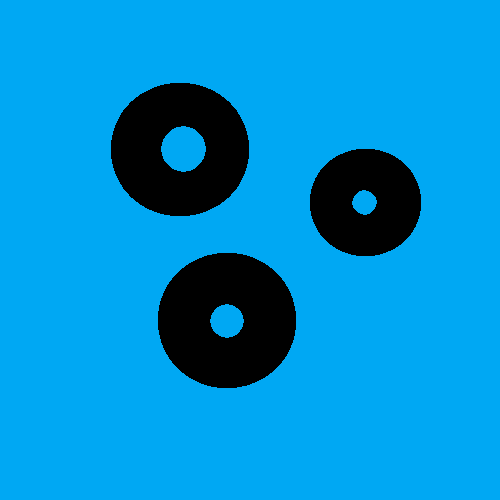

In [325]:
import IPython.display
import math 
import cv2 
import numpy as np
# Load image:

img = cv2.imread('TorCircle.png')
IPython.display.Image('TorCircle.png', width=320, height=240)

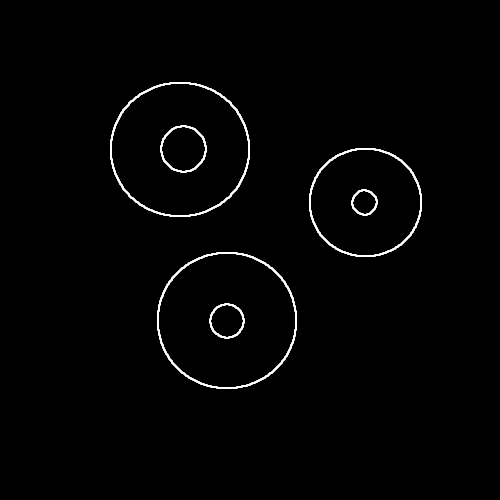

In [326]:
from PIL import Image, ImageDraw
# Load image:
input_image = Image.open('TorCircle.png')
input_pixels = input_image.load()

# Sobel kernels
kernely = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernelx = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                intensity = sum(input_pixels[xn, yn]) / 3
                magx += intensity * kernelx[a][b]
                magy += intensity * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(math.sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    
output_image.save("sobel1.png")
IPython.display.Image("sobel1.png", width=320, height=240)

In [327]:
col_img= cv2.imread('TorCircle.png')
img = cv2.imread("sobel1.png",0)
filtered= cv2.bilateralFilter(img,9,75,75)

circles = cv2.HoughCircles(filtered,cv2.HOUGH_GRADIENT,1,40,param1=200,param2=40
                           ,minRadius=10,maxRadius=100)
circles = np.uint16(np.around(circles))
circles1=[]
for i in circles[0,:]:
    cv2.circle(col_img,(i[0],i[1]),i[2],(0,255,0),2)
    #draws the circumference of the circle
    cv2.circle(col_img,(i[0],i[1]),2,(0,0,255),3)
    #draws the centre of the circle
    circles1.append(i)

cv2.imwrite('hough_circles.jpg',col_img)
print(circles1)

[array([180, 146,  68], dtype=uint16), array([228, 320,  69], dtype=uint16), array([368, 202,  54], dtype=uint16)]


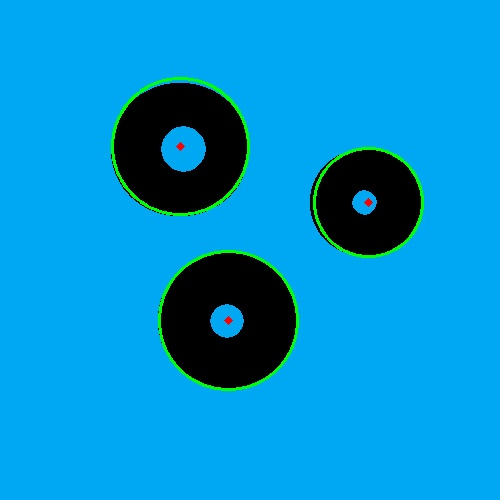

In [328]:
IPython.display.Image('hough_circles.jpg', width=320, height=240)

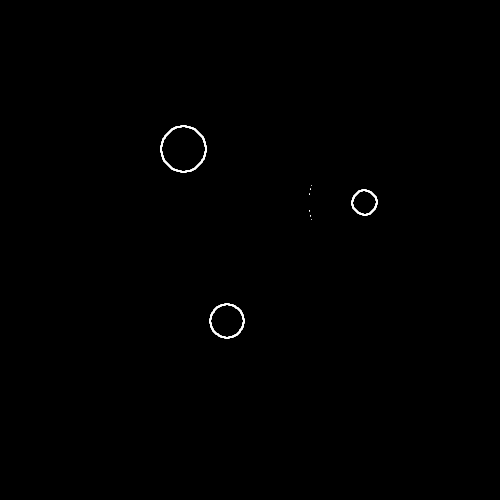

In [329]:
img = cv2.imread("sobel1.png",0)
for i in circles[0,:]:
    cv2.circle(img,(i[0],i[1]),i[2],(0,0,0),10)
cv2.imwrite('sobel1.png',img)
IPython.display.Image("sobel1.png", width=320, height=240)    



In [331]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,40,param1=400,param2=35
                           ,minRadius=2,maxRadius=100)
circles = np.uint16(np.around(circles))
circles2=[]
for i in circles[0,:]:
    circles2.append(i)
print(circles2)
tors =[]    
for i1 in circles1:
    for i2 in circles2:
        if int(i2[2])<int(i1[2]) and i1[2]-i2[2]>math.sqrt((int(i2[0])-int(i1[0]))**2+(int(i2[1])-int(i1[1]))**2):
            tors.append((i1,i2))

[array([184, 148,  21], dtype=uint16), array([364, 202,  13], dtype=uint16), array([226, 320,  16], dtype=uint16)]


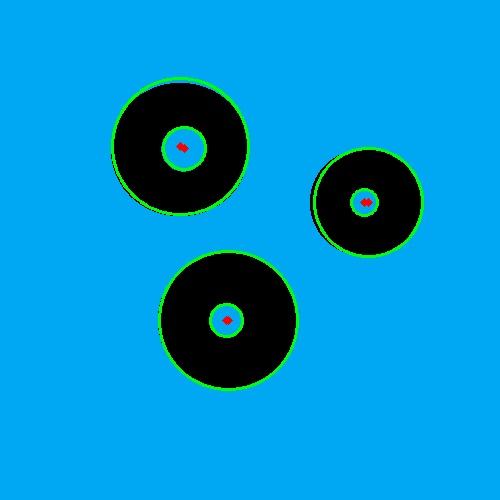

In [332]:
col_img = cv2.imread("TorCircle.png")
for i1, i2 in tors:
    cv2.circle(col_img,(i1[0],i1[1]),i1[2],(0,255,0),2)
    #draws the circumference of the circle
    cv2.circle(col_img,(i1[0],i1[1]),2,(0,0,255),3)
    
    cv2.circle(col_img,(i2[0],i2[1]),i2[2],(0,255,0),2)
    #draws the circumference of the circle
    cv2.circle(col_img,(i2[0],i2[1]),2,(0,0,255),3)
cv2.imwrite('hough_circles.jpg',col_img)
IPython.display.Image('hough_circles.jpg', width=320, height=240)    